In [1]:
# basic package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier # BaggingRegressor
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# import the dataset for model building

dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# pre-processing
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
for i in dataset.columns:
    print("*****************************************",i,
         "*********************************************")
    print()
    print(set(dataset[i].tolist()))
    print()

***************************************** Pregnancies *********************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

***************************************** Glucose *********************************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

***************************************** BloodPressure *******************************************

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,dataset['Glucose'].median(), dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,dataset['BloodPressure'].median(), dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,dataset['SkinThickness'].median(), dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,dataset['Insulin'].median(), dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,dataset['BMI'].median(), dataset['BMI'])

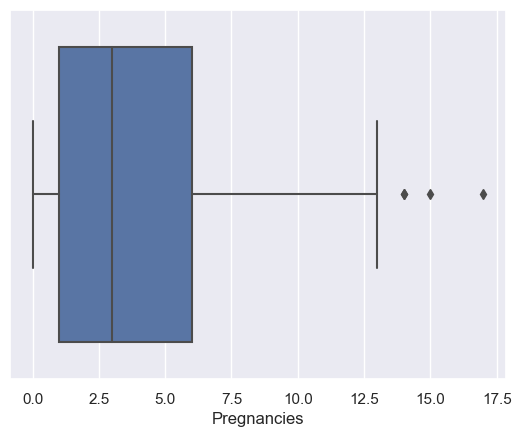

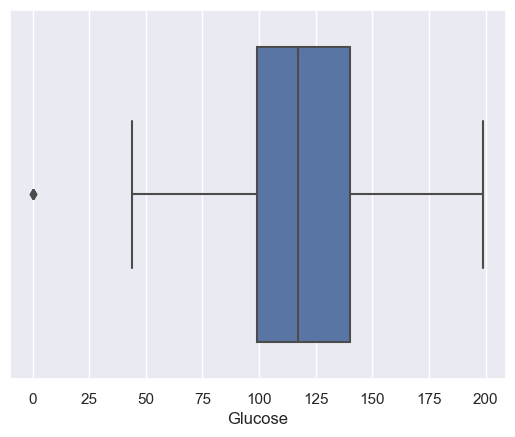

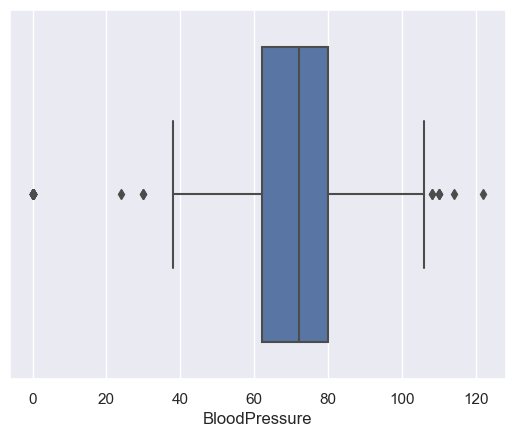

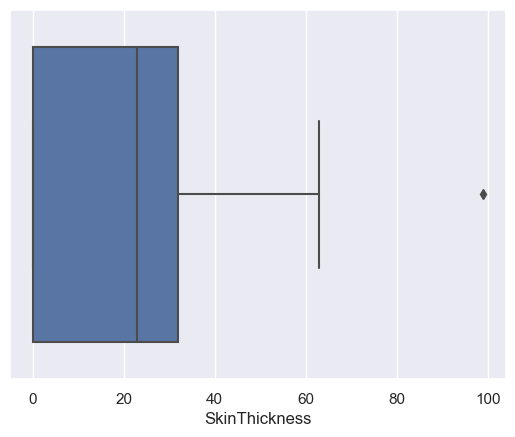

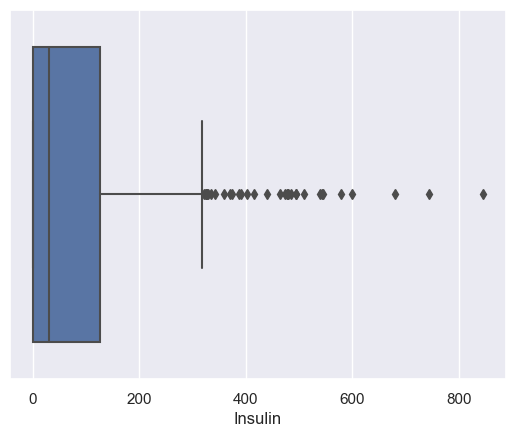

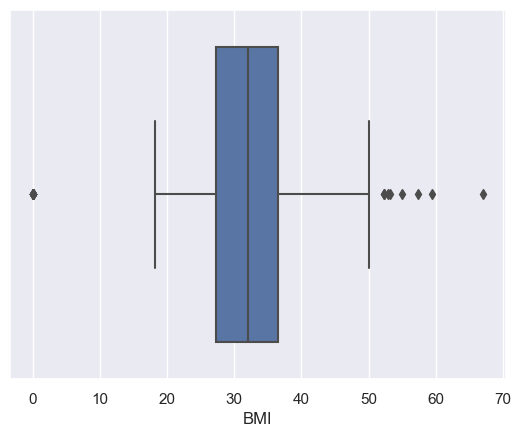

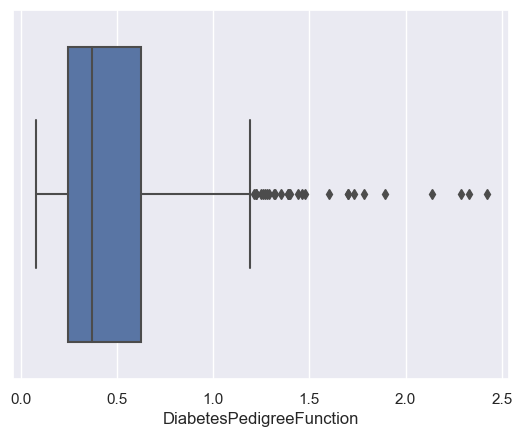

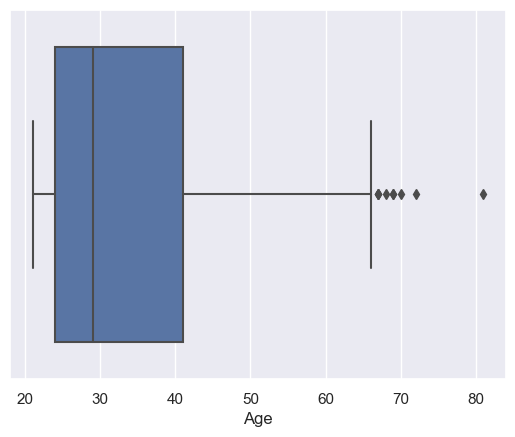

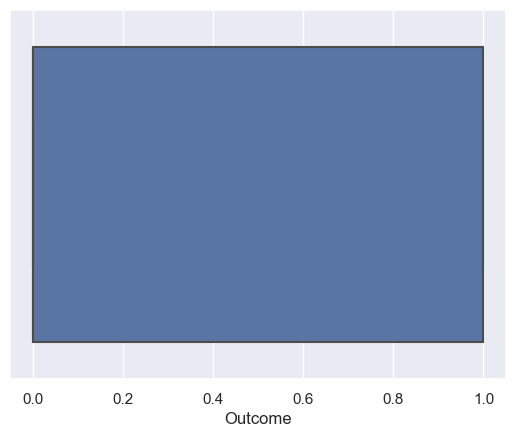

In [6]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# split the data into ind and dep variable
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
268/768*100

34.89583333333333

In [14]:
500/768*100

65.10416666666666

In [18]:
# Balance the data by using SMOTE techniques

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before SMOTE :", y.value_counts())
print()
print("After SMOTE :", y_smote.value_counts())

Before SMOTE : 0    500
1    268
Name: Outcome, dtype: int64

After SMOTE : 1    500
0    500
Name: Outcome, dtype: int64


In [19]:
# split the data into training and test for model building
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=1, stratify=y_smote)

# Bagging Classifier Model

In [133]:
# Model building
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [134]:
# Prediction
y_pred_bagg_train = bagging.predict(x_train)
y_pred_bagg_test = bagging.predict(x_test)

In [135]:
# Evaluate the model
print(classification_report(y_train, y_pred_bagg_train))
print()
print(classification_report(y_test, y_pred_bagg_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.98      0.97      0.97       201

    accuracy                           0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576


              precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.62      0.55      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192



In [136]:
print(accuracy_score(y_train, y_pred_bagg_train))
print()
print(accuracy_score(y_test, y_pred_bagg_test))

0.9826388888888888

0.7239583333333334


In [137]:
bagging_accuracy = accuracy_score(y_test, y_pred_bagg_test)

In [24]:
from sklearn.tree import plot_tree

In [25]:
bagging.estimators_

[DecisionTreeClassifier(random_state=704946364),
 DecisionTreeClassifier(random_state=679238776),
 DecisionTreeClassifier(random_state=877158424),
 DecisionTreeClassifier(random_state=136957881),
 DecisionTreeClassifier(random_state=579542158),
 DecisionTreeClassifier(random_state=355502204),
 DecisionTreeClassifier(random_state=1375497319),
 DecisionTreeClassifier(random_state=581185693),
 DecisionTreeClassifier(random_state=1742359141),
 DecisionTreeClassifier(random_state=1558799679)]

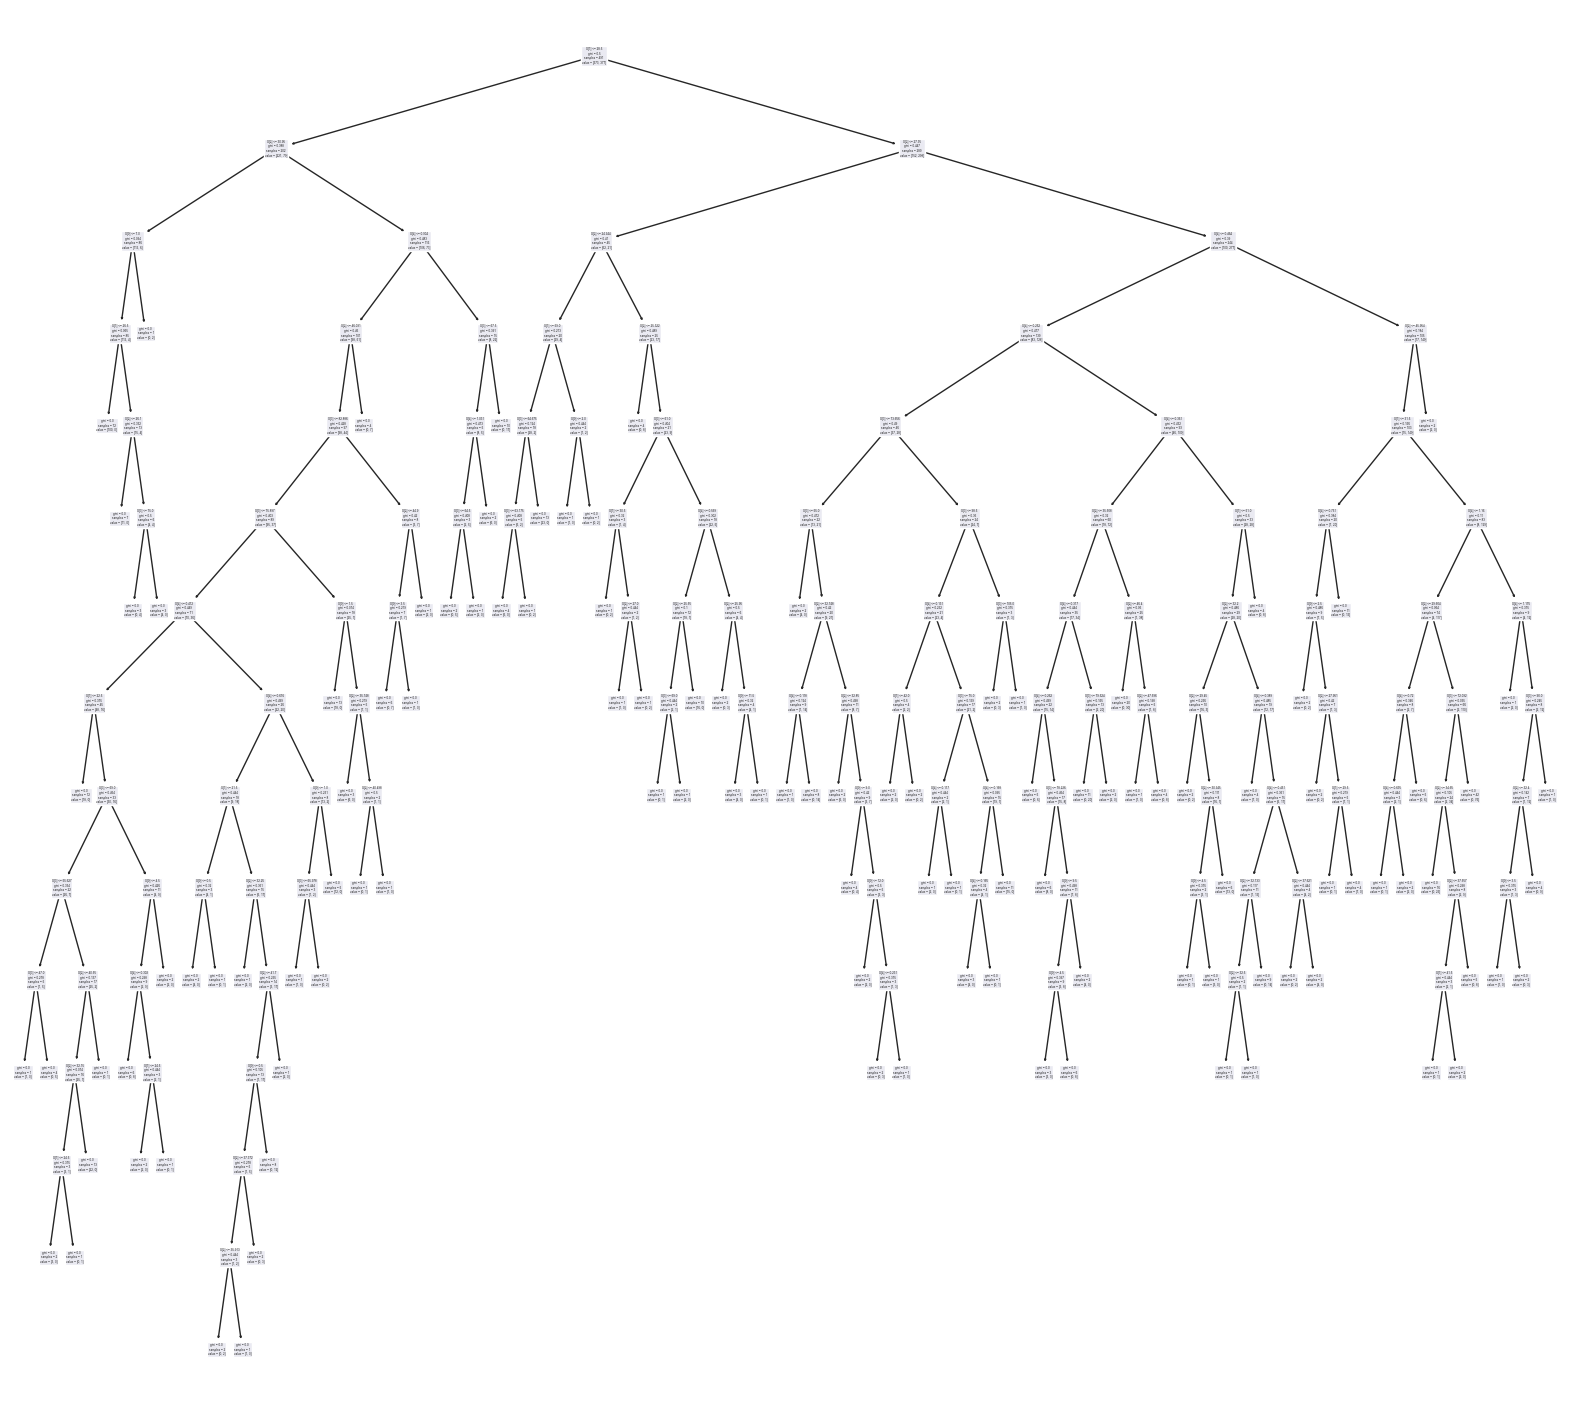

In [37]:
plt.figure(figsize=(20,18))
plot_tree(bagging.estimators_[1])
plt.show()

# RandomForest Classifier

In [138]:
rforest1 = RandomForestClassifier(n_estimators=500, criterion='entropy',max_depth=3, max_features=2, oob_score=True)
rforest1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=2,
                       n_estimators=500, oob_score=True)

In [139]:
y_pred_rf_train = rforest1.predict(x_train)
y_pred_rf_test = rforest1.predict(x_test)

In [81]:
rforest1.feature_importances_

array([0.03527631, 0.3260774 , 0.04029161, 0.05695317, 0.07600579,
       0.20847498, 0.08063455, 0.17628618])

In [140]:
# Evaluate the model
print(classification_report(y_train, y_pred_rf_train))
print()
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       375
           1       0.83      0.59      0.69       201

    accuracy                           0.81       576
   macro avg       0.82      0.76      0.78       576
weighted avg       0.81      0.81      0.80       576


              precision    recall  f1-score   support

           0       0.74      0.91      0.82       125
           1       0.71      0.40      0.51        67

    accuracy                           0.73       192
   macro avg       0.73      0.66      0.67       192
weighted avg       0.73      0.73      0.71       192



In [141]:
print(accuracy_score(y_train, y_pred_rf_train))
print()
print(accuracy_score(y_test, y_pred_rf_test))

0.8125

0.734375


In [142]:
rf_accuracy = accuracy_score(y_test, y_pred_rf_test)

In [71]:
# cross validation score
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rforest1, x_test, y_test, cv=10)
test_accuracy

array([0.76, 0.8 , 0.8 , 0.6 , 0.84, 0.72, 0.72, 0.76, 0.88, 0.76])

In [72]:
print("Test mean accuracy :", test_accuracy.mean())
print()
print("Test max accuracy :", test_accuracy.max())

Test mean accuracy : 0.764

Test max accuracy : 0.88


In [78]:
# Approach no - 2
# building model with scaled data and without balancing 
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [82]:
# split the data into training and test for model building
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=1, stratify=y)

In [95]:
rforest2 = RandomForestClassifier(criterion='gini')
rforest2.fit(x_train, y_train)

RandomForestClassifier()

In [96]:
y_pred_rf_train = rforest2.predict(x_train)
y_pred_rf_test = rforest2.predict(x_test)

In [91]:
rforest2.feature_importances_

array([0.05634321, 0.39151149, 0.03274458, 0.0276981 , 0.05695564,
       0.17587485, 0.09110236, 0.16776978])

In [97]:
# Evaluate the model
print(classification_report(y_train, y_pred_rf_train))
print()
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.65      0.51      0.57        67

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.73      0.73       192



In [98]:
print(accuracy_score(y_train, y_pred_rf_train))
print()
print(accuracy_score(y_test, y_pred_rf_test))

1.0

0.734375


In [99]:
# cross validation score
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rforest2, x_test, y_test, cv=10)
test_accuracy

array([0.85      , 0.45      , 0.84210526, 0.63157895, 0.68421053,
       0.89473684, 0.73684211, 0.84210526, 0.63157895, 0.73684211])

In [100]:
print("Test mean accuracy :", test_accuracy.mean())
print()
print("Test max accuracy :", test_accuracy.max())

Test mean accuracy : 0.73

Test max accuracy : 0.8947368421052632


# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [144]:
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)

In [145]:
print(accuracy_score(y_train, y_pred_logit_train))
print()
print(accuracy_score(y_test, y_pred_logit_test))

0.7864583333333334

0.7447916666666666


In [146]:
logit_accuracy = accuracy_score(y_test, y_pred_logit_test)

# DecisionTree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [108]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [109]:
print(accuracy_score(y_train, y_pred_dt_train))
print()
print(accuracy_score(y_test, y_pred_dt_test))

1.0

0.7083333333333334


# Voting Ensemble method

In [147]:
from sklearn.ensemble import VotingClassifier

In [148]:
evc = VotingClassifier(estimators=[('bagging', bagging),('rforest1', rforest1),('logit', logit) ], voting='soft')

model_evc = evc.fit(x_train, y_train)

In [149]:
y_pred_evc_train = evc.predict(x_train)
y_pred_evc_test = evc.predict(x_test)

In [117]:
print(accuracy_score(y_train, y_pred_evc_train))
print()
print(accuracy_score(y_test, y_pred_evc_test))

0.8993055555555556

0.75


In [150]:
evc_accuracy = accuracy_score(y_test, y_pred_evc_test)

In [151]:
list1 = ["Bagging","RandomForest","Logistic","Voting"]
list2 = [bagging_accuracy, rf_accuracy,logit_accuracy,evc_accuracy]
final_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy":list2})
print(final_accuracy)

    Method Used  Accuracy
0       Bagging  0.723958
1  RandomForest  0.734375
2      Logistic  0.744792
3        Voting  0.744792


AxesSubplot(0.125,0.11;0.775x0.77)


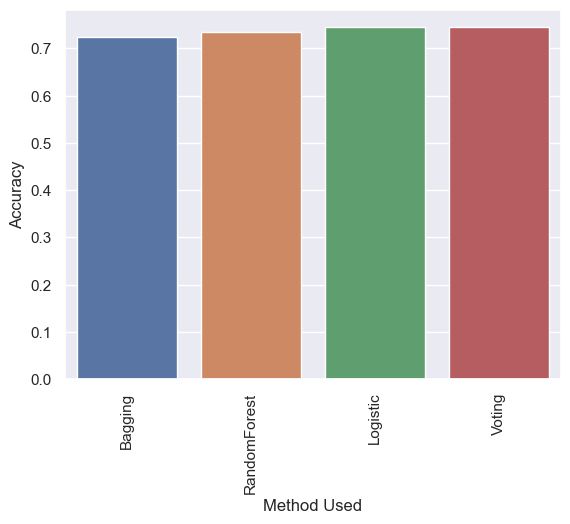

In [152]:
chart = sns.barplot(x='Method Used', y='Accuracy', data= final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)